In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Pandas_datareader (библиотека доступа к биржевым данным)

In [2]:
import pandas_datareader

In [3]:
# К примеру доступ к данным МосБиржи
# Можно включать в модели предсказания спроса и т.д.
# У данного источника есть период таймаута, что не позволяет получать актуальные данные и следовательно использовать их для игры на бирже
from pandas_datareader.moex import MoexReader
import datetime # библиотека представления данных времени

In [4]:
start_date = datetime.datetime(2020,1,1) # Берем данные с 1 января 2020
end_date = datetime.date.today() # берем дату сегодняшнего дня
rd = MoexReader("GAZP", start_date, end_date) # запрашиваем данные Газпрома с МосБиржи
df = rd.read()
df = df[df.BOARDID=='TQBR'] # фильтруем только один вид бумаг (TQBR)
# TQBR — рынок «Московской биржи». Первый уровень листинга
df.head()

,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,CLOSEAUCTIONPRICE,CLOSEPERIOD,CLOSEVAL,COUPONPERCENT,COUPONVALUE,CURRENCYID,DAILYCAPITALIZATION,DECIMALS,FACEUNIT,FACEVALUE,HIGH,HIGHBID,IRICPICLOSE,ISIN,ISSUESIZE,LASTPRICE,LASTTRADEDATE,LEGALCLOSEPRICE,LEGALOPENPRICE,LISTNAME,LOW,LOWOFFER,MARKETPRICE,MARKETPRICE2,MARKETPRICE3,MARKETPRICE3CUR,MARKETPRICE3TRADESVALUE,MARKETPRICE3TRADESVALUECUR,MONTHLYCAPITALIZATION,MP2VALTRD,MPVALTRD,NUMBID,NUMOFFER,NUMTRADES,OFFER,OFFERDATE,OPEN,OPENPERIOD,OPENVAL,PREV,PREVLEGALCLOSEPRICE,REGNUMBER,SECID,SHORTNAME,TRADINGSESSION,TRENDCLOSE,TRENDCLSPR,TRENDWAP,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03,259.00,8.962850e+09,NaN,NaN,TQBR,NaN,NaN,NaN,259.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.90,NaN,NaN,NaN,NaN,NaN,NaN,259.00,NaN,NaN,257.77,NaN,NaN,259.91,259.91,NaN,8.962850e+09,NaN,NaN,8.962850e+09,NaN,NaN,NaN,41509.0,NaN,NaN,259.18,NaN,NaN,NaN,NaN,NaN,GAZP,ГАЗПРОМ ао,3.0,NaN,NaN,NaN,NaN,NaN,8.962850e+09,34484710.0,259.91,NaN,NaN,NaN
2020-01-06,256.55,7.209356e+09,NaN,NaN,TQBR,NaN,NaN,NaN,256.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.00,NaN,NaN,NaN,NaN,NaN,NaN,256.55,NaN,NaN,254.80,NaN,NaN,256.12,256.12,NaN,7.209356e+09,NaN,NaN,7.209356e+09,NaN,NaN,NaN,38688.0,NaN,NaN,259.00,NaN,NaN,NaN,NaN,NaN,GAZP,ГАЗПРОМ ао,3.0,NaN,NaN,NaN,NaN,NaN,7.209356e+09,28148270.0,256.12,NaN,NaN,NaN
2020-01-08,255.79,6.547262e+09,NaN,NaN,TQBR,NaN,NaN,NaN,255.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.32,NaN,NaN,NaN,NaN,NaN,NaN,255.79,NaN,NaN,254.77,NaN,NaN,255.64,255.64,NaN,6.547262e+09,NaN,NaN,6.547262e+09,NaN,NaN,NaN,39141.0,NaN,NaN,256.25,NaN,NaN,NaN,NaN,NaN,GAZP,ГАЗПРОМ ао,3.0,NaN,NaN,NaN,NaN,NaN,6.547262e+09,25611080.0,255.64,NaN,NaN,NaN
2020-01-09,254.07,8.444500e+09,NaN,NaN,TQBR,NaN,NaN,NaN,254.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.68,NaN,NaN,NaN,NaN,NaN,NaN,254.07,NaN,NaN,251.82,NaN,NaN,254.17,254.17,NaN,8.444500e+09,NaN,NaN,8.444500e+09,NaN,NaN,NaN,50699.0,NaN,NaN,255.69,NaN,NaN,NaN,NaN,NaN,GAZP,ГАЗПРОМ ао,3.0,NaN,NaN,NaN,NaN,NaN,8.444500e+09,33224310.0,254.17,NaN,NaN,NaN
2020-01-10,251.90,7.220011e+09,NaN,NaN,TQBR,NaN,NaN,NaN,251.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.60,NaN,NaN,NaN,NaN,NaN,NaN,251.90,NaN,NaN,251.20,NaN,NaN,252.73,252.73,NaN,7.220011e+09,NaN,NaN,7.220011e+09,NaN,NaN,NaN,53957.0,NaN,NaN,254.00,NaN,NaN,NaN,NaN,NaN,GAZP,ГАЗПРОМ ао,3.0,NaN,NaN,NaN,NaN,NaN,7.220011e+09,28567810.0,252.75,NaN,NaN,NaN


In [5]:
df.tail(3)

,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,CLOSEAUCTIONPRICE,CLOSEPERIOD,CLOSEVAL,COUPONPERCENT,COUPONVALUE,CURRENCYID,DAILYCAPITALIZATION,DECIMALS,FACEUNIT,FACEVALUE,HIGH,HIGHBID,IRICPICLOSE,ISIN,ISSUESIZE,LASTPRICE,LASTTRADEDATE,LEGALCLOSEPRICE,LEGALOPENPRICE,LISTNAME,LOW,LOWOFFER,MARKETPRICE,MARKETPRICE2,MARKETPRICE3,MARKETPRICE3CUR,MARKETPRICE3TRADESVALUE,MARKETPRICE3TRADESVALUECUR,MONTHLYCAPITALIZATION,MP2VALTRD,MPVALTRD,NUMBID,NUMOFFER,NUMTRADES,OFFER,OFFERDATE,OPEN,OPENPERIOD,OPENVAL,PREV,PREVLEGALCLOSEPRICE,REGNUMBER,SECID,SHORTNAME,TRADINGSESSION,TRENDCLOSE,TRENDCLSPR,TRENDWAP,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-14,235.99,2.050499e+10,NaN,NaN,TQBR,NaN,NaN,NaN,235.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.58,NaN,NaN,NaN,NaN,NaN,NaN,235.99,NaN,NaN,229.31,NaN,NaN,232.80,232.80,NaN,2.050499e+10,NaN,NaN,2.050499e+10,NaN,NaN,NaN,126083.0,NaN,NaN,230.58,NaN,NaN,NaN,NaN,NaN,GAZP,ГАЗПРОМ ао,3.0,NaN,NaN,NaN,NaN,NaN,2.153114e+10,92446640.0,232.94,0.0,NaN,NaN
2021-04-15,235.49,1.405905e+10,NaN,NaN,TQBR,NaN,NaN,NaN,234.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.39,NaN,NaN,NaN,NaN,NaN,NaN,235.49,NaN,NaN,228.23,NaN,NaN,233.28,233.28,NaN,1.405905e+10,NaN,NaN,1.405905e+10,NaN,NaN,NaN,88923.0,NaN,NaN,230.10,NaN,NaN,NaN,NaN,NaN,GAZP,ГАЗПРОМ ао,3.0,NaN,NaN,NaN,NaN,NaN,1.472256e+10,63090250.0,233.31,0.0,NaN,NaN
2021-04-16,235.02,1.047394e+10,NaN,NaN,TQBR,NaN,NaN,NaN,235.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.45,NaN,NaN,NaN,NaN,NaN,NaN,235.02,NaN,NaN,232.70,NaN,NaN,235.03,235.03,NaN,1.047394e+10,NaN,NaN,1.047394e+10,NaN,NaN,NaN,61362.0,NaN,NaN,235.49,NaN,NaN,NaN,NaN,NaN,GAZP,ГАЗПРОМ ао,3.0,NaN,NaN,NaN,NaN,NaN,1.087581e+10,46274480.0,235.03,0.0,NaN,NaN


In [6]:
# Теперь сделаем тоже самое для СБЕРА, как пример
rd = MoexReader("SBER", start_date, end_date)
dfs = rd.read()

In [7]:
dfs.BOARDID.unique() # У каждого процесса есть масса подпроцессов, которые относятся к определенному виду бумаг. Вот тут представлены эти самые виды

array(['EQRP', 'PSRP', 'EQRD', 'EQWD', 'LIQR', 'PSRD', 'PSRE', 'EQWP',
       'SMAL', 'SPEQ', 'TQBR', 'MXBD', 'PSEQ', 'PTEQ', 'SOTC', 'RPMO',
       'RPEU', 'RPEO'], dtype=object)

In [8]:
dfs = dfs[dfs.BOARDID=="TQBR"]
dfs.head(3)

,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,CLOSEAUCTIONPRICE,CLOSEPERIOD,CLOSEVAL,COUPONPERCENT,COUPONVALUE,CURRENCYID,DAILYCAPITALIZATION,DECIMALS,FACEUNIT,FACEVALUE,HIGH,HIGHBID,IRICPICLOSE,ISIN,ISSUESIZE,LASTPRICE,LASTTRADEDATE,LEGALCLOSEPRICE,LEGALOPENPRICE,LISTNAME,LOW,LOWOFFER,MARKETPRICE,MARKETPRICE2,MARKETPRICE3,MARKETPRICE3CUR,MARKETPRICE3TRADESVALUE,MARKETPRICE3TRADESVALUECUR,MONTHLYCAPITALIZATION,MP2VALTRD,MPVALTRD,NUMBID,NUMOFFER,NUMTRADES,OFFER,OFFERDATE,OPEN,OPENPERIOD,OPENVAL,PREV,PREVLEGALCLOSEPRICE,REGNUMBER,SECID,SHORTNAME,TRADINGSESSION,TRENDCLOSE,TRENDCLSPR,TRENDWAP,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03,255.00,9.165475e+09,NaN,NaN,TQBR,NaN,NaN,NaN,255.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.19,NaN,NaN,NaN,NaN,NaN,NaN,255.00,NaN,NaN,253.70,NaN,NaN,255.65,255.65,NaN,9.165475e+09,NaN,NaN,9.165475e+09,NaN,NaN,NaN,46191.0,NaN,NaN,255.99,NaN,NaN,NaN,NaN,NaN,SBER,Сбербанк,3.0,NaN,NaN,NaN,NaN,NaN,9.165475e+09,35851840.0,255.62,NaN,NaN,NaN
2020-01-06,253.90,5.646010e+09,NaN,NaN,TQBR,NaN,NaN,NaN,253.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.84,NaN,NaN,NaN,NaN,NaN,NaN,253.90,NaN,NaN,251.40,NaN,NaN,252.64,252.64,NaN,5.646010e+09,NaN,NaN,5.646010e+09,NaN,NaN,NaN,34925.0,NaN,NaN,254.75,NaN,NaN,NaN,NaN,NaN,SBER,Сбербанк,3.0,NaN,NaN,NaN,NaN,NaN,5.646010e+09,22348300.0,252.64,NaN,NaN,NaN
2020-01-08,259.15,1.048588e+10,NaN,NaN,TQBR,NaN,NaN,NaN,259.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.15,NaN,NaN,NaN,NaN,NaN,NaN,259.15,NaN,NaN,253.03,NaN,NaN,256.90,256.90,NaN,1.048588e+10,NaN,NaN,1.048588e+10,NaN,NaN,NaN,54429.0,NaN,NaN,253.57,NaN,NaN,NaN,NaN,NaN,SBER,Сбербанк,3.0,NaN,NaN,NaN,NaN,NaN,1.048588e+10,40817240.0,256.88,NaN,NaN,NaN


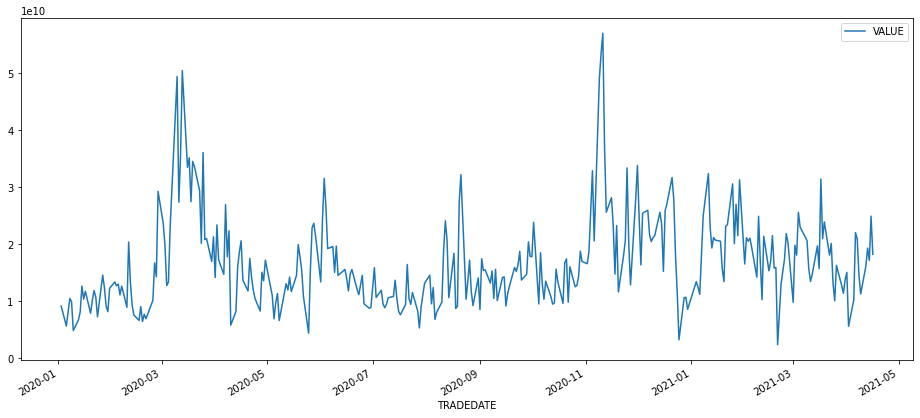

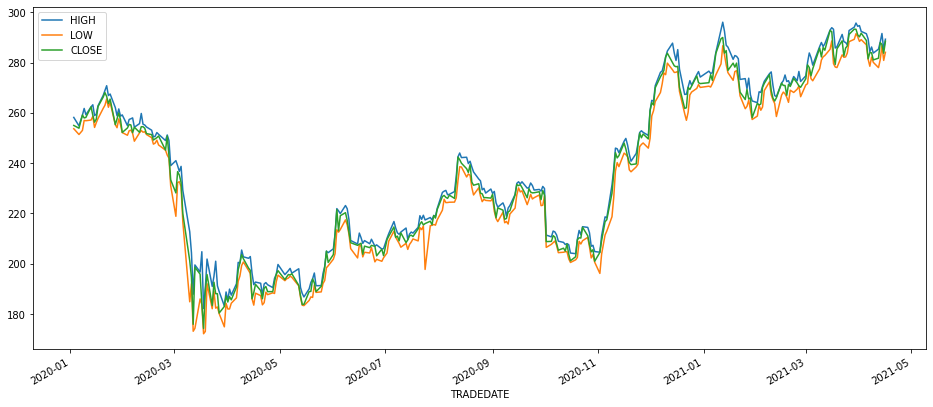

In [9]:
dfs[['VALUE']].plot(figsize = (16,7))
plt.show()
dfs[['HIGH','LOW','CLOSE']].plot(figsize = (16,7))
plt.show()

### YAHOO Finance

In [10]:
!pip install yfinance

In [11]:
import yfinance as yf

In [12]:
# Создадим объект получения данных
tickers_list = ['YNDX.ME','TTLK.ME','AAPL','WMT','IBM','MU']

# запишем данные в таблицк
data = pd.DataFrame(columns=tickers_list)

# Получим данные

for ticker in tickers_list:
  data[ticker] = yf.download(ticker, start_date, end_date)['Adj Close']

# Посмотри на данные
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,YNDX.ME,TTLK.ME,AAPL,WMT,IBM,MU
Date,,,,,,
2020-01-03,2685.000000,0.225808,73.610840,115.472214,125.962540,54.529999
2020-01-06,2672.000000,0.249378,74.197395,115.237137,125.737526,53.570000
2020-01-08,2677.000000,0.250792,75.036385,113.777695,126.872055,57.520000
2020-01-09,2728.399902,0.243721,76.630219,114.953079,128.212891,57.310001
2020-01-10,2725.000000,0.245135,76.803459,113.993179,128.166000,56.669998


In [13]:
data.tail()

,YNDX.ME,TTLK.ME,AAPL,WMT,IBM,MU
Date,,,,,,
2021-04-12,4822.200195,0.5990,131.240005,139.800003,134.589996,95.589996
2021-04-13,4646.399902,0.5965,134.429993,139.369995,131.179993,92.150002
2021-04-14,4675.600098,0.5960,132.029999,139.320007,132.630005,90.669998
2021-04-15,4654.600098,0.5960,134.500000,140.160004,132.580002,90.269997
2021-04-16,4689.799805,0.5985,134.160004,140.610001,133.589996,90.660004


Посмотрим на графиках

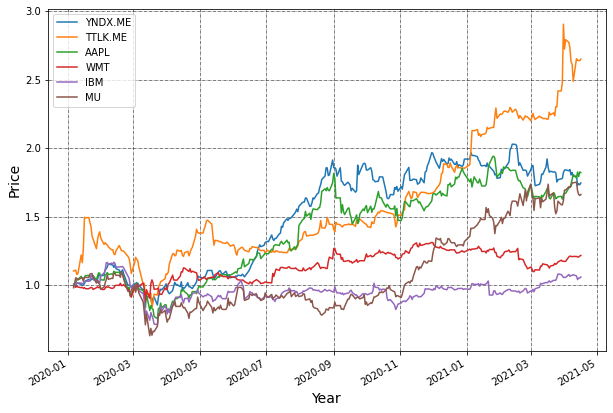

In [14]:
((data.pct_change()+1).cumprod()).plot(figsize=(10,7))

plt.legend()
plt.ylabel('Price', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.grid(which="major", color = 'k', linestyle = '-.', linewidth = 0.5)
plt.show()

Посмотрим на временной анализ только по Яндексу

In [15]:
Yandex = yf.Ticker("YNDX.ME")
df = Yandex.history(period = 'max')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-12,4806.000000,4907.000000,4778.799805,4822.200195,549437,0,0
2021-04-13,4865.000000,4882.000000,4510.000000,4646.399902,2793341,0,0
2021-04-14,4631.600098,4720.000000,4576.200195,4675.600098,2554067,0,0
2021-04-15,4635.000000,4697.399902,4617.000000,4654.600098,863212,0,0
2021-04-16,4682.200195,4697.000000,4650.600098,4689.799805,454838,0,0


### Получение данных

Соберем данные в пакет

In [16]:
Data_time = df.merge(data, on='Date')
Data_time.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,YNDX.ME,TTLK.ME,AAPL,WMT,IBM,MU
Date,,,,,,,,,,,,,
2020-01-03,2712.800049,2718.000000,2677.399902,2685.000000,263538,0,0,2685.000000,0.225808,73.610840,115.472214,125.962540,54.529999
2020-01-06,2670.600098,2679.600098,2657.000000,2672.000000,226724,0,0,2672.000000,0.249378,74.197395,115.237137,125.737526,53.570000
2020-01-08,2663.800049,2707.000000,2636.199951,2677.000000,252559,0,0,2677.000000,0.250792,75.036385,113.777695,126.872055,57.520000
2020-01-09,2682.600098,2737.199951,2682.600098,2728.399902,306801,0,0,2728.399902,0.243721,76.630219,114.953079,128.212891,57.310001
2020-01-10,2728.399902,2760.000000,2700.199951,2725.000000,308204,0,0,2725.000000,0.245135,76.803459,113.993179,128.166000,56.669998


Уменьшим лишнее(дубликаты по яндексу)

In [17]:
Data_time.drop('Close', axis = 1, inplace = True)
Data_time.sort_index
Data_time.tail()

,Open,High,Low,Volume,Dividends,Stock Splits,YNDX.ME,TTLK.ME,AAPL,WMT,IBM,MU
Date,,,,,,,,,,,,
2021-04-12,4806.000000,4907.000000,4778.799805,549437,0,0,4822.200195,0.5990,131.240005,139.800003,134.589996,95.589996
2021-04-13,4865.000000,4882.000000,4510.000000,2793341,0,0,4646.399902,0.5965,134.429993,139.369995,131.179993,92.150002
2021-04-14,4631.600098,4720.000000,4576.200195,2554067,0,0,4675.600098,0.5960,132.029999,139.320007,132.630005,90.669998
2021-04-15,4635.000000,4697.399902,4617.000000,863212,0,0,4654.600098,0.5960,134.500000,140.160004,132.580002,90.269997
2021-04-16,4682.200195,4697.000000,4650.600098,454838,0,0,4689.799805,0.5985,134.160004,140.610001,133.589996,90.660004


### Начинаем обработку по стандарту для ML процесса

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Сгенерируем новые признаки

Добавим данные из календаря

In [19]:
data = Data_time.copy()
data['year'] = data.index.year
data['day_of_week'] = data.index.dayofweek
data['day_of_year'] = data.index.dayofyear
data['month'] = data.index.month

In [20]:
data.head()

,Open,High,Low,Volume,Dividends,Stock Splits,YNDX.ME,TTLK.ME,AAPL,WMT,IBM,MU,year,day_of_week,day_of_year,month
Date,,,,,,,,,,,,,,,,
2020-01-03,2712.800049,2718.000000,2677.399902,263538,0,0,2685.000000,0.225808,73.610840,115.472214,125.962540,54.529999,2020,4,3,1
2020-01-06,2670.600098,2679.600098,2657.000000,226724,0,0,2672.000000,0.249378,74.197395,115.237137,125.737526,53.570000,2020,0,6,1
2020-01-08,2663.800049,2707.000000,2636.199951,252559,0,0,2677.000000,0.250792,75.036385,113.777695,126.872055,57.520000,2020,2,8,1
2020-01-09,2682.600098,2737.199951,2682.600098,306801,0,0,2728.399902,0.243721,76.630219,114.953079,128.212891,57.310001,2020,3,9,1
2020-01-10,2728.399902,2760.000000,2700.199951,308204,0,0,2725.000000,0.245135,76.803459,113.993179,128.166000,56.669998,2020,4,10,1


Анализ деятельности клиента показывает, что его действия очень часто связаны с днями недели. Тоесть это довольно цикличная штука и это можно анализировать дальше

In [21]:
# шаг по данным для построения обучающих примеров(позволяет генерить объекты со сдвигами по времени, тоесть предсказывать мы будем уже след день)
step = 1

# длина прошлого(это знание о том, что было раньше)
p = 7

# горизонт предсказания()
future = 1
h = future

Экспоненциальное сглаживание(скользящий средний / экспоненциальный средний)

Мы имеем коэф сохранения и запоминания, которые позволяют определеить, какую часть предистории мы оставим в качестве воспоминания, а какую часть текущего значения  мы добавим к нашей модели.

Тоесть в зависимости от alpha мы строим модели либо с короткой памятью, либо с длинной памятью

In [22]:
def exponential_smoothing(series, alpha):
  result = [series[0]] # первое значение в массиве
  for n in range(1, len(series)):
    result.append(alpha*series[n] + (1-alpha)*result[n-1])
  return result

Добавим историю(формирование исторических данных для временного ряда)

Мы берем нашу целевую переменную и собираемся ее предсказывать. Но мы посмотрим на несколько реализаций значений этой целевой переменной в прошлом.

Далее мы делаем экпоненциально сглаженные данные из нашего собственного ряда

In [23]:
# история данных на глубину p
for i in range(p):
  data['t'+str(i)] = 0.0
  data['t'+str(i)].values[i+1:]=data['YNDX.ME'].values[:-1-i]


df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
data['exp_0_01'] = exponential_smoothing(data['YNDX.ME'], 0.01) # 0.01 - коэф alpha(забывания)
data['exp_0_03'] = exponential_smoothing(data['YNDX.ME'], 0.03)
data['exp_0_08'] = exponential_smoothing(data['YNDX.ME'], 0.08)

for i in range(p):
  data['exp_0_01'+str(i)] = 0.0
  data['exp_0_01'+str(i)].values[i+1:]=data['exp_0_01'].values[:-1-i]
  data['exp_0_03'+str(i)] = 0.0
  data['exp_0_03'+str(i)].values[i+1:]=data['exp_0_03'].values[:-1-i]
  data['exp_0_08'+str(i)] = 0.0
  data['exp_0_08'+str(i)].values[i+1:]=data['exp_0_08'].values[:-1-i]

# добавим разности - 1-й порядок
data['diff1'] = 0.0
data['diff1'] = data['YNDX.ME'].diff(1) # diff - дифференциирование, разности с временным лагом 1
for i in range( p):
  data['diff1'+str(i)] = 0.0
  data['diff1'+str(i)].values[i+1:]=data['diff1'].values[:-1-i]



data.head()

,Open,High,Low,Volume,Dividends,Stock Splits,YNDX.ME,TTLK.ME,AAPL,WMT,IBM,MU,year,day_of_week,day_of_year,month,t0,t1,t2,t3,t4,t5,t6,exp_0_01,exp_0_03,exp_0_08,exp_0_010,exp_0_030,exp_0_080,exp_0_011,exp_0_031,exp_0_081,exp_0_012,exp_0_032,exp_0_082,exp_0_013,exp_0_033,exp_0_083,exp_0_014,exp_0_034,exp_0_084,exp_0_015,exp_0_035,exp_0_085,exp_0_016,exp_0_036,exp_0_086,diff1,diff10,diff11,diff12,diff13,diff14,diff15,diff16
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03,2712.800049,2718.000000,2677.399902,263538,0,0,2685.000000,0.225808,73.610840,115.472214,125.962540,54.529999,2020,4,3,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2685.000000,2685.000000,2685.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-06,2670.600098,2679.600098,2657.000000,226724,0,0,2672.000000,0.249378,74.197395,115.237137,125.737526,53.570000,2020,0,6,1,2685.000000,0.0,0.0,0.0,0.0,0.0,0.0,2684.870000,2684.610000,2683.960000,2685.000000,2685.000000,2685.000000,0.0000,0.0000,0.0000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-08,2663.800049,2707.000000,2636.199951,252559,0,0,2677.000000,0.250792,75.036385,113.777695,126.872055,57.520000,2020,2,8,1,2672.000000,2685.0,0.0,0.0,0.0,0.0,0.0,2684.791300,2684.381700,2683.403200,2684.870000,2684.610000,2683.960000,2685.0000,2685.0000,2685.0000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,-13.000000,NaN,0.0,0.0,0.0,0.0,0.0
2020-01-09,2682.600098,2737.199951,2682.600098,306801,0,0,2728.399902,0.243721,76.630219,114.953079,128.212891,57.310001,2020,3,9,1,2677.000000,2672.0,2685.0,0.0,0.0,0.0,0.0,2685.227386,2685.702246,2687.002936,2684.791300,2684.381700,2683.403200,2684.8700,2684.6100,2683.9600,2685.00,2685.00,2685.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.399902,5.000000,-13.0,NaN,0.0,0.0,0.0,0.0
2020-01-10,2728.399902,2760.000000,2700.199951,308204,0,0,2725.000000,0.245135,76.803459,113.993179,128.166000,56.669998,2020,4,10,1,2728.399902,2677.0,2672.0,2685.0,0.0,0.0,0.0,2685.625112,2686.881179,2690.042701,2685.227386,2685.702246,2687.002936,2684.7913,2684.3817,2683.4032,2684.87,2684.61,2683.96,2685.0,2685.0,2685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.399902,51.399902,5.0,-13.0,NaN,0.0,0.0,0.0


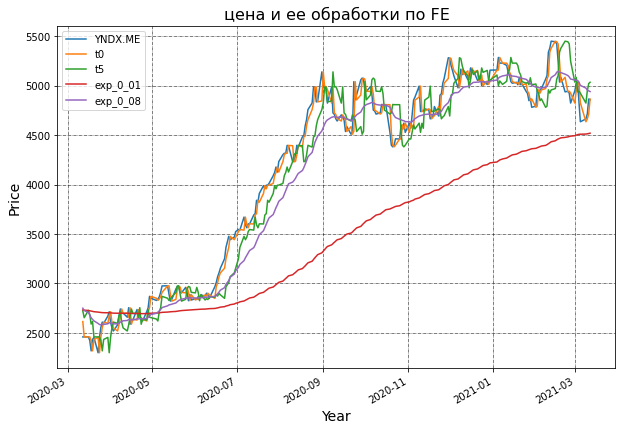

In [24]:
# рисуем данные и признаки по ним
data.loc['2020-03-12':'2021-03-12',['YNDX.ME','t0','t5','exp_0_01','exp_0_08']].plot(figsize=(10, 7))

# покажем легенду
plt.legend()

# параметры фигуры
plt.title("цена и ее обработки по FE", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Сбросим "бракованные" данные( мы делали сдвиг вдоль истории, из-за этого возникли NaN значения) и от них нужно избавиться

In [25]:
data = data.iloc[p+1:,:] # строки с неполными данными из-за формирования истории на глубине р
data.fillna(0, inplace=True)

In [26]:
# длина истории для работы
xLen = p

# Во временных рядах train и test строятся не так как в обычном ML
# И это логично, это же временной ряд, значит все test должны лежать позже по времени, относительно train

train_split = -100
# вычисляем точку разделения ряда на тесты и тренировку
#train_split = data_f.shape[0] - valLen - bias
# делим
train_data = data.iloc[0 : train_split - 1,:]
val_data = data.iloc[train_split:,:]
train_data.head(5)

,Open,High,Low,Volume,Dividends,Stock Splits,YNDX.ME,TTLK.ME,AAPL,WMT,IBM,MU,year,day_of_week,day_of_year,month,t0,t1,t2,t3,t4,t5,t6,exp_0_01,exp_0_03,exp_0_08,exp_0_010,exp_0_030,exp_0_080,exp_0_011,exp_0_031,exp_0_081,exp_0_012,exp_0_032,exp_0_082,exp_0_013,exp_0_033,exp_0_083,exp_0_014,exp_0_034,exp_0_084,exp_0_015,exp_0_035,exp_0_085,exp_0_016,exp_0_036,exp_0_086,diff1,diff10,diff11,diff12,diff13,diff14,diff15,diff16
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-16,2678.800049,2869.199951,2673.199951,1471244,0,0,2719.800049,0.338004,78.018631,113.523026,129.375565,57.680000,2020,3,16,1,2690.000000,2685.000000,2703.399902,2725.000000,2728.399902,2677.000000,2672.000000,2686.176515,2688.358688,2692.910782,2685.836883,2687.386275,2690.572585,2685.794831,2687.305438,2690.622375,2685.802860,2687.376740,2691.111277,2685.625112,2686.881179,2690.042701,2685.227386,2685.702246,2687.002936,2684.791300,2684.381700,2683.403200,2684.870000,2684.610000,2683.960000,29.800049,5.000000,-18.399902,-21.600098,-3.399902,51.399902,5.000000,-13.000000
2020-01-17,2730.000000,2776.800049,2726.199951,669449,0,0,2772.800049,0.337061,78.882370,112.602303,129.684982,57.660000,2020,4,17,1,2719.800049,2690.000000,2685.000000,2703.399902,2725.000000,2728.399902,2677.000000,2687.042750,2690.891929,2699.301924,2686.176515,2688.358688,2692.910782,2685.836883,2687.386275,2690.572585,2685.794831,2687.305438,2690.622375,2685.802860,2687.376740,2691.111277,2685.625112,2686.881179,2690.042701,2685.227386,2685.702246,2687.002936,2684.791300,2684.381700,2683.403200,53.000000,29.800049,5.000000,-18.399902,-21.600098,-3.399902,51.399902,5.000000
2020-01-20,2791.000000,2827.000000,2777.000000,339883,0,0,2800.000000,0.337533,0.000000,0.000000,0.000000,0.000000,2020,0,20,1,2772.800049,2719.800049,2690.000000,2685.000000,2703.399902,2725.000000,2728.399902,2688.172323,2694.165171,2707.357770,2687.042750,2690.891929,2699.301924,2686.176515,2688.358688,2692.910782,2685.836883,2687.386275,2690.572585,2685.794831,2687.305438,2690.622375,2685.802860,2687.376740,2691.111277,2685.625112,2686.881179,2690.042701,2685.227386,2685.702246,2687.002936,27.199951,53.000000,29.800049,5.000000,-18.399902,-21.600098,-3.399902,51.399902
2020-01-21,2800.000000,2800.000000,2762.600098,350935,0,0,2770.000000,0.329519,78.347801,113.219391,130.491364,58.970001,2020,1,21,1,2800.000000,2772.800049,2719.800049,2690.000000,2685.000000,2703.399902,2725.000000,2688.990599,2696.440216,2712.369148,2688.172323,2694.165171,2707.357770,2687.042750,2690.891929,2699.301924,2686.176515,2688.358688,2692.910782,2685.836883,2687.386275,2690.572585,2685.794831,2687.305438,2690.622375,2685.802860,2687.376740,2691.111277,2685.625112,2686.881179,2690.042701,-30.000000,27.199951,53.000000,29.800049,5.000000,-18.399902,-21.600098,-3.399902
2020-01-22,2800.000000,2800.000000,2673.199951,757936,0,0,2790.000000,0.322447,78.627464,113.718918,134.917007,59.169998,2020,2,22,1,2770.000000,2800.000000,2772.800049,2719.800049,2690.000000,2685.000000,2703.399902,2690.000693,2699.247010,2718.579616,2688.990599,2696.440216,2712.369148,2688.172323,2694.165171,2707.357770,2687.042750,2690.891929,2699.301924,2686.176515,2688.358688,2692.910782,2685.836883,2687.386275,2690.572585,2685.794831,2687.305438,2690.622375,2685.802860,2687.376740,2691.111277,20.000000,-30.000000,27.199951,53.000000,29.800049,5.000000,-18.399902,-21.600098


### Делим на части выборку

Все данные, которые идут из вышепоказанной таблицы, НО!! Главный фокус в том, что как X мы использум все данные, за исключением последнего объекта, который доступен нам для предсказания. Тоесть мы исключаем последнюю строку из данных X. 

Зато в Y включаем все наши значения YNDX(цена закрытия по всем дням) и берем на одну строку раньше.

Тоесть мы значение YNDX.ME из первой строки отбрасываем и по данным первой строки пытаемся предсказать значение YNDX.ME из второй строки. 

Иными словами - мы делаем сдвиг +1 и пытаемся на имеющихся данных для каждого из n дней предсказать n+1 значение для каждого из дней в прошлом, чтобы попытаться объяснить зависимость целевой переменной и попытаться предсказывать их в настоящем будущем

In [27]:
xTrain = train_data.iloc[:-h,:].values
yTrain =  train_data['YNDX.ME'].values[h:]

xVal = val_data.values[:-h]
yVal = val_data['YNDX.ME'].values[h:]

# ну и конечно скалируем данные
scx = StandardScaler()
xTrains = scx.fit_transform(xTrain)
xVals = scx.transform(xVal)

scy = StandardScaler()
yTrains = scy.fit_transform(yTrain.reshape(-1, 1))
yVals = scy.transform(yVal.reshape(-1, 1))

In [28]:
print(xTrains.shape)

print(yTrains.shape)


print(xVals.shape)

print(yVals.shape)

(212, 55)
(212, 1)
(99, 55)
(99, 1)


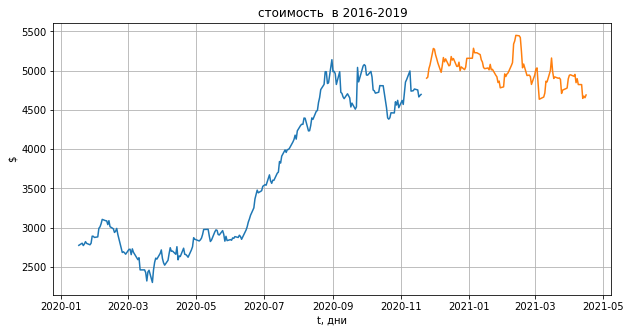

In [29]:
plt.figure(figsize=(10,5))
plt.plot(train_data['YNDX.ME'].index[h:],yTrain[:])
# На графике - желтый кусочек для валидации
plt.plot(val_data['YNDX.ME'].index[h:],yVal[:])
plt.grid('on')
plt.xlabel('t, дни')
plt.ylabel('$')
plt.title('стоимость  в 2016-2019')
plt.show()

### **Обучение модели**

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

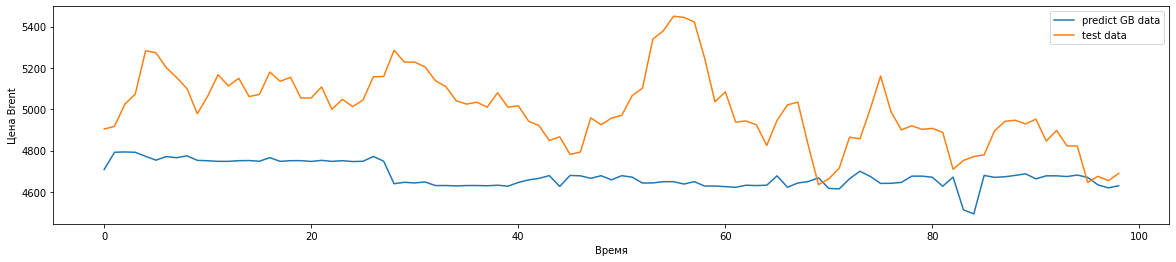

ошибка градиентного бустинга :   6.3770578207012525 %


In [31]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=10, random_state=0, n_estimators=200)
model_gb.fit( xTrains, yTrains.ravel() ) 
X_test_pred_gb = model_gb.predict(xVals)
yt=scy.inverse_transform(yVals.reshape(-1,1))
yp=scy.inverse_transform(X_test_pred_gb.reshape(-1,1))
plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(yp, label='predict GB data' )
plt.plot(yt, label='test data')


plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=yt, y_pred=yp)

print('ошибка градиентного бустинга :  ', er_g, '%')

Ну модель получилась ужасная, мало что описывает

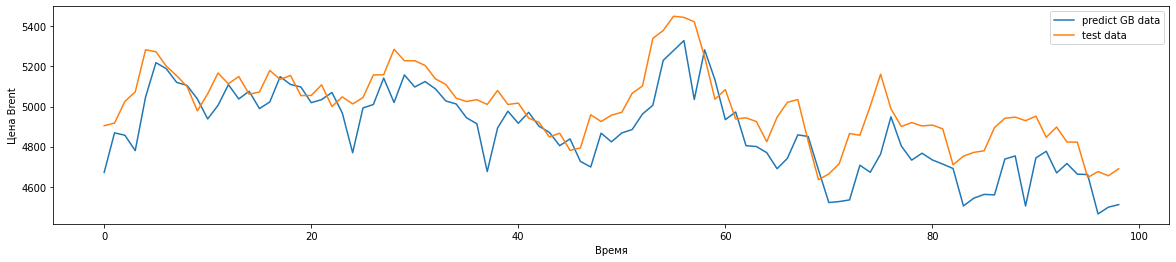

ошибка градиентного бустинга :   2.715970231285065 %


In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_l = LinearRegression()
model_l.fit( xTrain, yTrain.ravel() ) 
X_test_pred_l = model_l.predict(xVal)
yt=(yVal.reshape(-1,1))
yp=(X_test_pred_l.reshape(-1,1))
plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Цена Brent')
plt.plot(yp, label='predict GB data' )
plt.plot(yt, label='test data')


plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=yt, y_pred=yp)

print('ошибка градиентного бустинга :  ', er_g, '%')

Тут нужно понимать, что мы пытаемся предсказать зависимость в будущем.

Тут может показаться, что линейная регрессия выглядит лучше. НО это не так. В данном примере модель с очевидным запаздыванием как раз на лаги предсказания. Она бесполезна!!!

В обоих примера не получились оба предсказания, но как бы оно не было, градиентный бустинг хоть пытается))